# Modelo depredador-presa de Lotka-Volterra

# Resumen

En la siguiente texto vamos a hablar del modelo que rige el comportamiento poblacional de una o varias especies el modelo depredador-presa de Lotka-Volterra. cómo se comporta y qué es capaz de predecir, así como de las principales restricciones del modelo.,enfocandonos en la función logística,sus cualidades y sus limitaciones frente a un entorno natural.
Haremos bastante enfasis en cómo se comporta, analizando diferentes gráficas. 

Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:

                                                       dx/dt=αx−βxy

                                                       dy/dt=−γy+δyx

donde x es el número de presas (cebras en nuestro caso) e y es el número de depredadores (leones). Los parámetros son constantes positivas que representan:

    α: tasa de crecimiento de las presas.
    β: éxito en la caza del depredador.
    γ: tasa de decrecimiento de los depredadores.
    δ: éxito en la caza y cuánto alimenta cazar una presa al depredador.


# 1. Ajustar el modelo basado en un crecimiento logistico de las presas

Para lograr realizar este anàlisis se se puede explicar el modelo de acuerdo al tiempo de la siguiente manera: 

Sean x(t) y  y(t)las poblaciones de conejos y depredadores respectivamente:

La razon de cambio de las presas y los depredadores son: 

                                        dx (t)/dt = a1 x(t)- a2 x(t) y(t)
                                        dy (t)/dt = -b1y(t)+ b2 x(t) y(t)
                                        
Donde a1 es la razòn de crecimiento de la presa en ausencia de los depredadores, b1 es la razòn de muerte del depredador en ausencia de la presa.

En ausencia de depredadores la ecuación para la presa se reduce a dx/dt =a1x.

Se toman los valores de a1 = 0,21; x=20 en un tiempo de 20 años: Estos valores se representan en un función logística:






In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
%matplotlib inline

In [13]:
def logistic_curve(t, a=1, m=0, n=1, tau=1):
    e = np.exp(-t / tau)
    return a * (1 + m * e) / (1 + n * e)

Text(48.25,0.5,'presas')

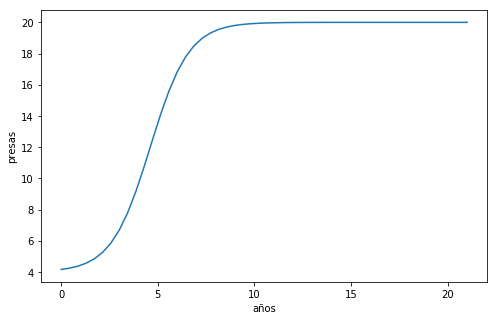

In [19]:
x_ = np.linspace(0,21)
plt.figure('función logística', figsize=(8,5))
plt.plot(x_, logistic_curve(x_, 20, m=20, n=100, tau=1))
plt.savefig('funcion_logistica.png')


plt.xlabel('años')
plt.ylabel('presas')

De acuerdo a la gráfica la cantiddad de presas se incrementa y se interpreta que en elgun punto se llega a una estabilidad por factores externos (Clima,otras especies)

# 2. Simular 2 casos con diveras condiciones iniciales. Gráficas poblacion Vs tiempo.

Caso No 1: Condiciones Iniciales x0= 21 y0=21

Definimos la función que representará el sistema de ecuaciones en forma canónica para pasárselo a odeint:

In [45]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

Definimos los parámetros de nuestro problema, las condiciones iniciales y el tiempo final de la integración así como el número de pasos.

In [23]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 21
y0 = 21
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)



Resolvemos la ecuación:


In [25]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

y representamos los resultados en función del tiempo:

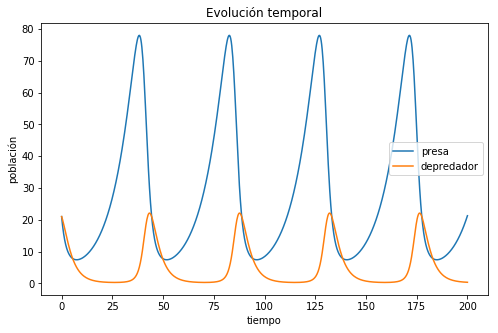

In [27]:

plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.xlabel('tiempo')
plt.ylabel('población')
plt.legend()
plt.savefig('evolucion_temporal.png')



En este caso se puede evidenciar que la evolución la lidera las presas con el trasncurso del tiempo.


Caso No 2: Condiciones Iniciales x0= 21 y0=90


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [47]:
%matplotlib inline

In [38]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

In [54]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 21
y0 = 90
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

In [55]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

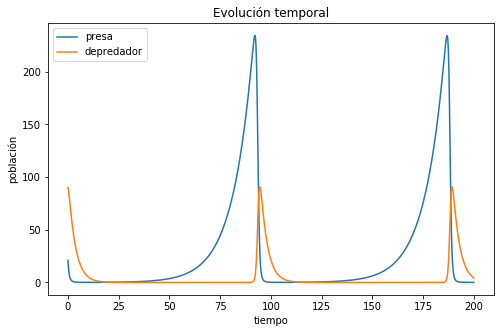

In [56]:
plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.xlabel('tiempo')
plt.ylabel('población')
plt.legend()
plt.savefig('evolucion_temporal.png')

En este segundo caso se puede observar que a pesar que el numero de presas empiece en menor numero, con el paso del tiempo este valor se incrementa

# 3. Ajustar su implementación para estimar las soluciones al sistema de ecuaciones a traves del metodo de Runge Kutta.

A continuacion se muestra el programa usado para la resolución numérica de nuestro problema mediante el método de Runge-Kutta de 4º orden para 1000 intervalos. 

In [140]:
#Valores iniciales
t0=0; tN=100; #Extremos del intervalo a estudiar
y0=[3,1]'; #Valores de población iniciales
N=1000; h=(tN-t0)/N;#Nº y  amplitud de subintervalos
y=y0;
R(1)=y(1);%Valor inicial de R (población de conejos)
F(1)=y(2);% Valor inicial de F (población de zorros)
a=0.4; b=0.37; c=0.3; d=0.05; %Parámetros
%Algoritmo
for n=1:N
k1=[a*y(1)-c*y(1)*y(2);-b*y(2)+d*y(2)*y(1)];
k2=[a*(y(1)+1/2*h*k1(1))-c*(y(1)+1/2*h*k1(1))*(y(2)+1/2*h*k1(2));-b*(y(2)+1/2*h*k1(2))+d*(y(2)+1/2*h*k1(2))*(y(1)+1/2*h*k1(1))];
k3=[a*(y(1)+1/2*h*k2(1))-c*(y(1)+1/2*h*k2(1))*(y(2)+1/2*h*k2(2));-b*(y(2)+1/2*h*k2(2))+d*(y(2)+1/2*h*k2(2))*(y(1)+1/2*h*k2(1))];
k4=[a*(y(1)+h*k3(1))-c*(y(1)+h*k3(1))*(y(2)+h*k3(2));-b*(y(2)+h*k3(2))+d*(y(2)+h*k3(2))*(y(1)+h*k3(1))];
y=y+h/6*(k1+2*k2+2*k3+k4);
R(n+1)=y(1);
F(n+1)=y(2);
end
%Dibujo
t=t0:h:tN;
figure(1)
hold on
plot(t,R,'g')%Población de conejos en función del tiempo
plot(t,F,'r')%Población de zorros en función del tiempo
title('Población de conejos(verde) y zorros(rojo) en función del tiempo');
ylabel('t(años)');
hold off
figure(2)
plot(R,F,'b')%Población de zorros en función de la de conejos
title('Población de zorros en función de la de conejos');
xlabel('R(miles de conejos)');
ylabel('F(miles de zorros)');


SyntaxError: EOL while scanning string literal (<ipython-input-140-e1977826ec40>, line 3)

# CONCLUSIONES

La función logística explica un poco mejor cómo se comporta un población en un entorno natural.

En el caso de que sea presa o depredador, Lotka y Volterra dieron con un sistema de ecuaciones diferenciales que establece la dinámica de ambas poblaciones a lo largo del tiempo.